### Importing

In [1]:
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,precision_recall_fscore_support,precision_score,recall_score,confusion_matrix,auc,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### loading

In [2]:
X=joblib.load('sav_1/vsm.sav')
dataset=joblib.load('dataset_with_labels.sav')
y=np.array(dataset)[:,1]

##### DataSet Noarmalization

In [3]:
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.81818182, 0.3       , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.89473684, 0.51351351, 0.16666667, ..., 0.33333333, 0.25      ,
        0.25      ],
       [0.96969697, 0.375     , 0.12903226, ..., 0.33333333, 0.        ,
        0.25      ],
       [0.9       , 0.44827586, 0.10714286, ..., 0.        , 0.        ,
        0.25      ]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Grid search params

In [5]:
Cs = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': Cs}
clf = LinearSVC()

### GridSearch

In [6]:
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

### Fit

In [7]:
best_model = grid_search.fit(X_train, y_train)

c:\users\subhani\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### predict on X_test

In [8]:
y_pred = best_model.predict(X_test)

## Metrics

### Confusion matrix

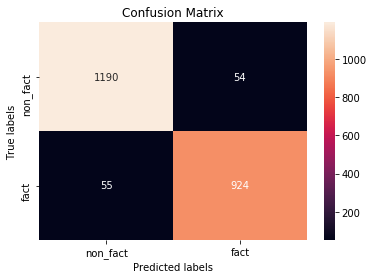

In [9]:
cm=confusion_matrix(y_test, best_model.predict(X_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non_fact', 'fact']); ax.yaxis.set_ticklabels(['non_fact', 'fact']);

### F1_score

In [10]:
f1_score(y_test, y_pred, pos_label='1')

0.9443025038323966

In [11]:
# target_names = ['0','1']
# print(classification_report(y_test, y_pred, target_names=target_names))

In [12]:
precision_recall_fscore_support(y_test, y_pred, pos_label='1',warn_for=('precision', 'recall', 'f-score'))

c:\users\subhani\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


(array([0.95582329, 0.94478528]),
 array([0.95659164, 0.94382022]),
 array([0.95620731, 0.9443025 ]),
 array([1244,  979], dtype=int64))

### Precision

In [13]:
precision_score(y_test, y_pred, pos_label='1')

0.9447852760736196

### Recall

In [14]:
recall_score(y_test, y_pred, pos_label='1')

0.9438202247191011

### AUC_ROC curve

0.992330910536048


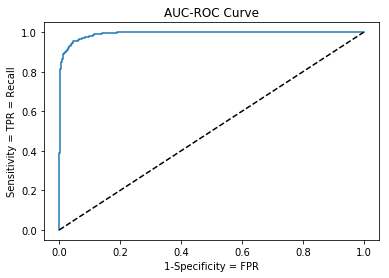

In [17]:
scores=best_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, scores, pos_label='1')
roc_auc = auc(fpr, tpr)

print(roc_auc)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity = FPR')
plt.ylabel("Sensitivity = TPR = Recall")
plt.title("AUC-ROC Curve")
plt.show()

In [16]:
print(list(y_test).count('0'),' ',list(y_test).count('1'))

1244   979


### Train Dataset

In [18]:
y_pred_train=best_model.predict(X_train)

In [19]:
f1_score(y_train, y_pred_train, pos_label='1')

0.9469582704876822

In [20]:
precision_score(y_train, y_pred_train, pos_label='1')

0.9546376077040041

In [21]:
recall_score(y_train, y_pred_train, pos_label='1')

0.9394014962593517